# Tutorial 4

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
import math
path = "../../src/"

## Student Performance

### Task 1.1

$H_0$ No significant association found.

$H_1$ There is association between `address` and `paid`

In [34]:
data = pd.read_csv(path + "data/student/student-por.csv", sep=";")
df = pd.DataFrame(data)

# generate contingency table using crosstab
contingency_table = pd.crosstab(df['address'], df['paid'])
contingency_table

paid,no,yes
address,,
R,183,14
U,427,25


In [26]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant association between address and paid.")
else:
    print("Fail to reject H0: No significant association found.")

Fail to reject H0: No significant association found.


### Task 1.2

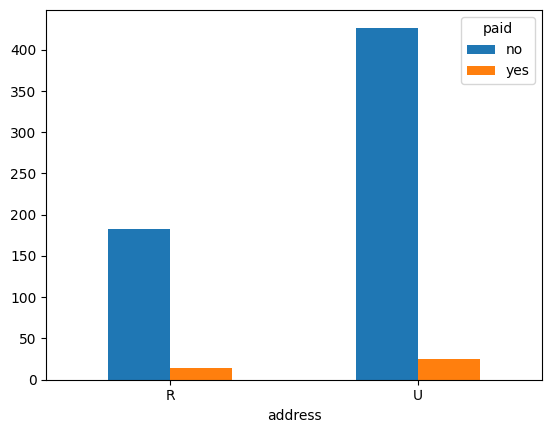

In [18]:
ax = contingency_table.plot(kind='bar', stacked=False, rot=1.0)

### Task 1.3

In [20]:
proportion_table = pd.crosstab(df['address'], df['paid'], normalize='index')
proportion_table

paid,no,yes
address,,
R,0.928934,0.071066
U,0.944690,0.055310


### Task 1.4

In [25]:
risk = contingency_table['yes']['R'] / contingency_table['yes']['U']
risk

np.float64(1.7857142857142858)

### Task 1.5

Range of values for RR is $[0, +\infty]$, when the number of urban residents who paid for extra classes is zero, $RR \rightarrow +\infty$. Note that $$RR = \frac{\# \text{ of Yes, R} / \# \text{ of total}}{\# \text{ of Yes, U} / \# \text{ of total}}$$
While $$\text{Odds Ratio} = \frac{p_1 / (1-p_1)}{p_2 / (1-p_2)} = \frac{\# \text{ of Yes, U} / \# \text{ of No, U}}{\# \text{ of Yes, R} / \# \text{ of No, R}}$$, they are not same by defination.

### Task 1.6

In [29]:
pd.cut?

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

In [40]:
df['Letter Grade'] = pd.cut(x=df['G3'], bins=[0, 10, 12, 15, 18, 20], labels=['F', 'D', 'C', 'B', 'A'])

### Task 1.7

### Task 1.8

Mosaic plot reflects the count in each cell (through the area), along with the proportions of interest.

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.5790960451977402,
   np.float64(0.47150123907656194)),
  ('0', '1'): (0.0,
   np.float64(0.5009130037824443),
   0.5790960451977402,
   np.float64(0.22107734446328417)),
  ('0', '2'): (0.0,
   np.float64(0.7514021129516107),
   0.5790960451977402,
   np.float64(0.1252119473066389)),
  ('0', '3'): (0.0,
   np.float64(0.9060258249641321),
   0.5790960451977402,
   np.float64(0.05478022694665444)),
  ('0', '4'): (0.0,
   np.float64(0.990217816616669),
   0.5790960451977402,
   np.float64(0.009782183383331177)),
  ('1', '0'): (0.6207627118644069,
   np.float64(0.0),
   0.15536723163841804,
   np.float64(0.021876519202722412)),
  ('1', '1'): (0.6207627118644069,
   np.float64(0.051288283908604765),
   0.15536723163841804,
   np.float64(0.2479338842975206)),
  ('1', '2'): (0.6207627118644069,
   np.float64(0.32863393291200776),
   0.15536723163841804,
   np.float64(0.3135634419056879)),
  ('1', '3'): (0.62076271

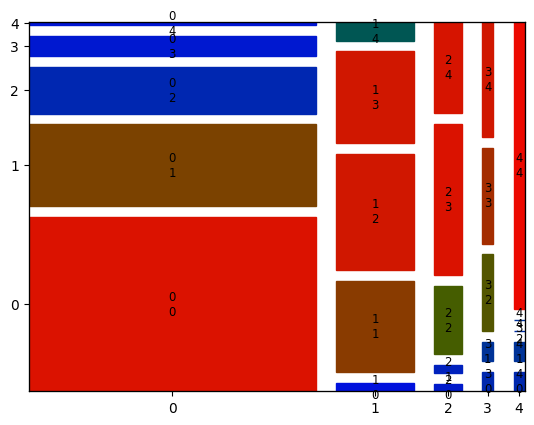

In [50]:
table = np.asarray(pd.crosstab(df['Dalc'], df['Walc']))
mosaic(table, statistic=True, gap=0.05)